In [111]:
import os

while 'news_data' not in os.listdir():
    os.chdir('..')

file_names = [os.path.join('news_data', file_name) for file_name in os.listdir('news_data')]
dfs = []
for file_name in os.listdir('news_data'):
    dfs.append(pd.read_csv(os.path.join('news_data', file_name), index_col = 0))

df = pd.concat(dfs)
df.head()

,news_headline,news_article,news_category
0,"After Musk tweets 'Use Signal', unrelated stoc...",After Elon Musk endorsed encrypted messaging a...,technology
1,Donald Trump permanently banned from Twitter,Twitter has permanently banned US President Do...,technology
2,Man finds father's image on Google Earth 7 yea...,"A man in Japan found an image of his father, w...",technology
3,Bad sign: Mexican Prez after Trump's social me...,Following the suspension of US President Donal...,technology
4,Signal app registration system crashes after M...,Private encrypted messaging app Signal tweeted...,technology


In [112]:
df.shape

(12120, 3)

In [113]:
df['len_headline'] = df.apply(lambda row: len(row['news_headline']), axis = 1)
df['len_article'] = df.apply(lambda row: len(row['news_article']), axis = 1)
df['words_headline'] = df.apply(lambda row: len(row['news_headline'].split(' ')), axis = 1)
df['words_article'] = df.apply(lambda row: len(row['news_article'].split(' ')), axis = 1)

df.head()

,news_headline,news_article,news_category,len_headline,len_article,words_headline,words_article
0,"After Musk tweets 'Use Signal', unrelated stoc...",After Elon Musk endorsed encrypted messaging a...,technology,79,385,12,60
1,Donald Trump permanently banned from Twitter,Twitter has permanently banned US President Do...,technology,44,312,6,50
2,Man finds father's image on Google Earth 7 yea...,"A man in Japan found an image of his father, w...",technology,80,321,15,59
3,Bad sign: Mexican Prez after Trump's social me...,Following the suspension of US President Donal...,technology,68,378,10,60
4,Signal app registration system crashes after M...,Private encrypted messaging app Signal tweeted...,technology,69,370,10,59


<AxesSubplot:xlabel='news_category', ylabel='Count'>

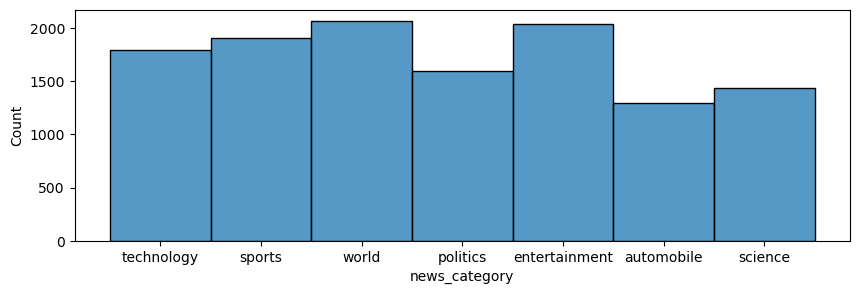

In [114]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (10, 3)
sns.histplot(data=df, x='news_category')

<AxesSubplot:xlabel='len_headline', ylabel='Count'>

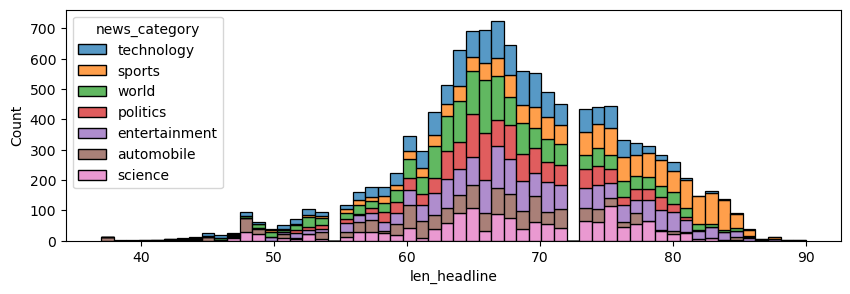

In [115]:
sns.histplot(data=df, x='len_headline', hue='news_category', multiple='stack')

<AxesSubplot:xlabel='len_article', ylabel='Count'>

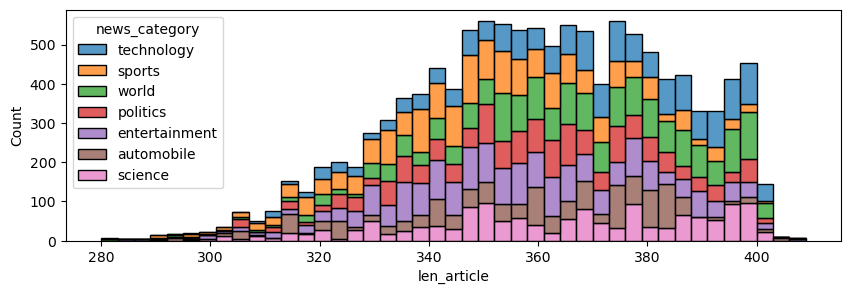

In [116]:
sns.histplot(data=df, x='len_article', hue='news_category', multiple='stack')

<AxesSubplot:xlabel='words_headline', ylabel='Count'>

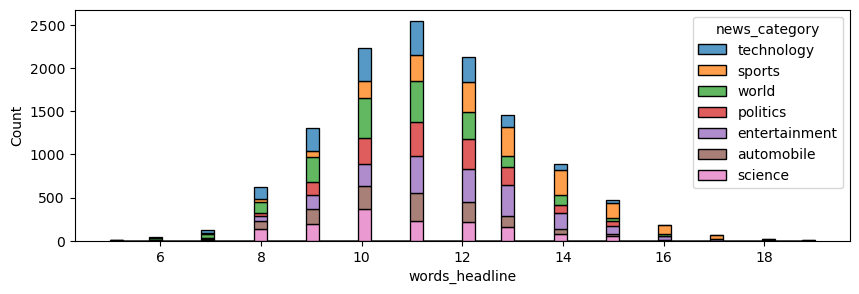

In [117]:
sns.histplot(data=df, x='words_headline', hue='news_category', multiple='stack')

<AxesSubplot:xlabel='words_article', ylabel='Count'>

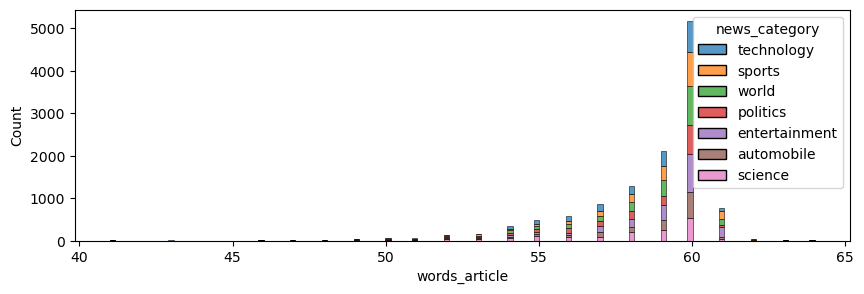

In [118]:
sns.histplot(data=df, x='words_article', hue='news_category', multiple='stack')

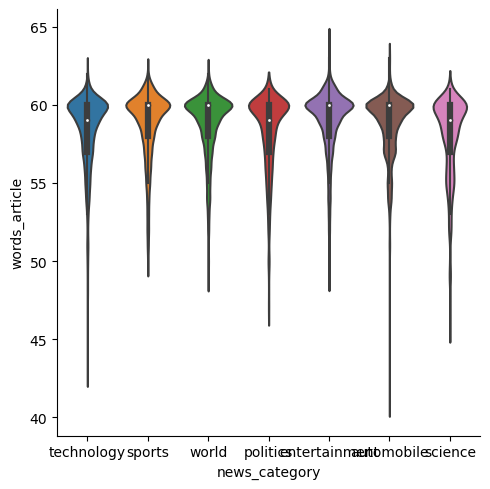

In [123]:
sns.catplot(data=df, x='news_category', y='words_article', kind='violin')